## GReaT Example with California Housing Dataset

In [1]:
# Execute only once!
import os
import sys

sys.path.append("/tf/notebooks/be_great-main/examples")
os.chdir("..")

os.environ["CUDA_VISIBLE_DEVICES"]="3"


# 设置环境变量

import os
%env NCCL_P2P_DISABLE=1
%env NCCL_IB_DISABLE=1
# 获取NCCL_IB_DISABLE的环境变量值
nccl_ib_disable = os.getenv('NCCL_IB_DISABLE')

# 打印环境变量的值
print(f"The current value for NCCL_IB_DISABLE is: {nccl_ib_disable}")

env: NCCL_P2P_DISABLE=1
env: NCCL_IB_DISABLE=1
The current value for NCCL_IB_DISABLE is: 1


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
import logging
from sklearn import datasets

In [4]:
from utils import set_logging_level
from be_great import GReaT

/opt/conda/envs/great/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
import matplotlib.pyplot as plt

In [6]:
logger = set_logging_level(logging.INFO)

### Load Data

In [7]:
data = datasets.fetch_california_housing(as_frame=True).frame
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Create GReaT Model

Only one epoch here for demonstration

In [8]:
great = GReaT("distilgpt2",                         # Name of the large language model used (see HuggingFace for more options)
              epochs=1,                             # Number of epochs to train (only one epoch for demonstration)
              save_steps=2000,                      # Save model weights every x steps
              logging_steps=50,                     # Log the loss and learning rate every x steps
              experiment_dir="trainer_california",  # Name of the directory where all intermediate steps are saved
              #lr_scheduler_type="constant",        # Specify the learning rate scheduler 
              #learning_rate=5e-5                   # Set the inital learning rate
             )

### Start Training

In [9]:
trainer = great.fit(data)

2024-07-25 15:27:27,423 - INFO - Convert data into HuggingFace dataset object... (great.py:153)
2024-07-25 15:27:27,440 - INFO - Create GReaT Trainer... (great.py:158)
2024-07-25 15:27:27,688 - INFO - Start training... (great.py:174)


You're using a GPT2TokenizerFast tokenizer. Please note that with a fast tokenizer, using the `__call__` method is faster than using a method to encode the text followed by a call to the `pad` method to get a padded encoding.


Step,Training Loss
50,2.735600
100,2.103200
150,2.010100
200,1.939100
250,1.940400
300,1.926800
350,1.881500
400,1.873000
450,1.867800
500,1.838700


In [10]:
loss_hist = trainer.state.log_history.copy()
loss_hist.pop()

{'train_runtime': 73.1091,
 'train_samples_per_second': 282.318,
 'train_steps_per_second': 35.29,
 'total_flos': 461339826978816.0,
 'train_loss': 1.8210855143938878,
 'epoch': 1.0,
 'step': 2580}

In [11]:
loss = [x["loss"] for x in loss_hist]
epochs = [x["epoch"] for x in loss_hist]

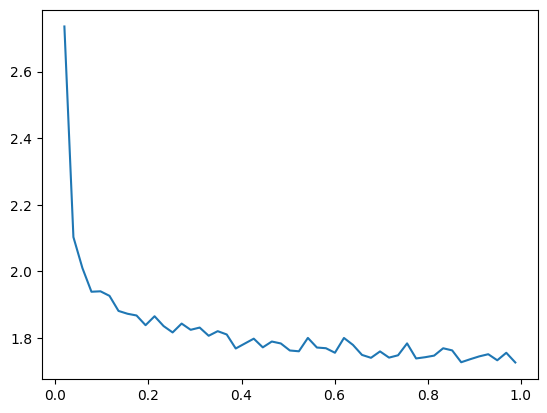

In [12]:
plt.plot(epochs, loss)

### Save Model

In [13]:
# great.save("california")

### Load Model

In [14]:
great = GReaT.load_from_dir("california")

/tf/notebooks/be_great-main/be_great/great.py:487: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  great.model.load_state_dict(torch.load(path + "/model.pt", map_location="cpu

In [15]:
great.load_finetuned_model("/tf/notebooks/be_great-main/california/model.pt")

/tf/notebooks/be_great-main/be_great/great.py:459: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model.load_state_dict(torch.load(path))


### Generate Samples

In [16]:
n_samples = 1000

In [17]:
samples = great.sample(n_samples, k=50, device="cuda:3")

RuntimeError: CUDA error: invalid device ordinal
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [ ]:
samples.head()

NameError: name 'samples' is not defined

In [ ]:
samples.shape

In [ ]:
samples.to_csv("california_samples.csv")

## Plot Data

Original Data

In [ ]:
true_samples = data.sample(n = 1000)

In [ ]:
plt.scatter(true_samples["Longitude"], true_samples["Latitude"], c=true_samples["MedHouseVal"])

Generated samples

In [ ]:
#samples = pd.read_csv("california_samples.csv")

In [ ]:
plt.scatter(samples["Longitude"], samples["Latitude"], c=samples["MedHouseVal"])